<a href="https://colab.research.google.com/github/kuty2004/linear_algebra2/blob/main/python3_%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


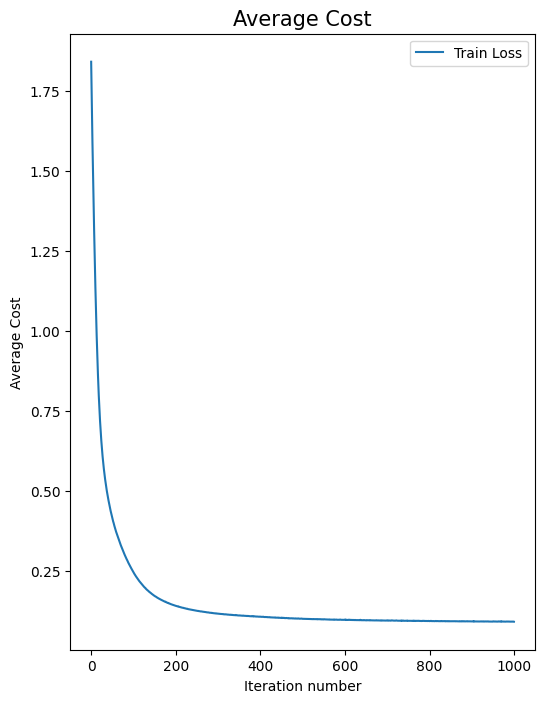

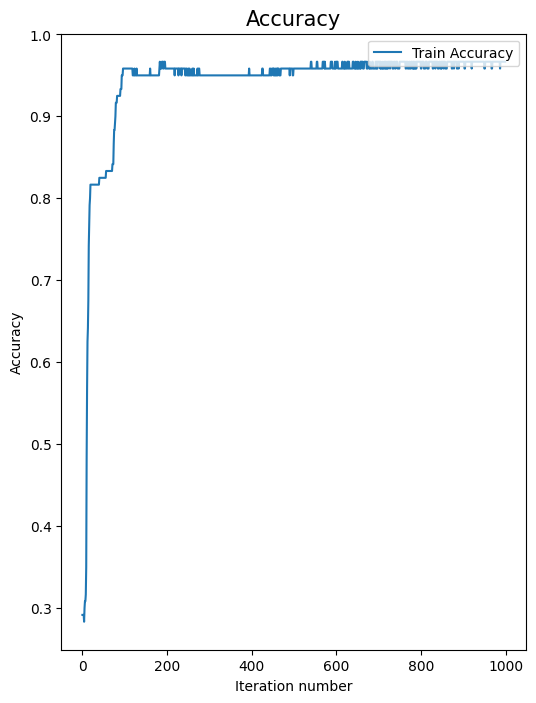

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# 파일 경로 설정
file_path = "/content/drive/MyDrive/Iris.csv"

# CSV 파일에서 데이터 불러오기
df = pd.read_csv(file_path)

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = df.loc[:,features].values
y = df.loc[:,['Species']].values

# 데이터 표준화
x = StandardScaler().fit_transform(x)

# PCA 수행
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# 타겟 데이터를 숫자 형태로 변환
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 타겟 데이터를 One-Hot Encoding 형식으로 변환
y_one_hot = to_categorical(y_encoded)

# 인공신경망 모델 생성
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))  # 입력층과 은닉층 추가
model.add(Dense(3, activation='softmax'))           # 출력층 추가

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# PCA로 변환된 데이터 사용
X_pca = principalComponents

# 모델 훈련
history = model.fit(X_pca, y_one_hot, validation_split=0.2, epochs=1000, batch_size=10, verbose=0)

# 손실 그래프 출력
plt.figure(figsize=(6,8))
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Iteration number')
plt.ylabel('Average Cost')
plt.title('Average Cost', fontsize=15)
plt.show()


# 정확도 그래프 출력
plt.figure(figsize=(6,8))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.title('Accuracy', fontsize=15)
plt.show()